<a href="https://colab.research.google.com/github/cyberhades21/MachineLearning/blob/main/navy_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


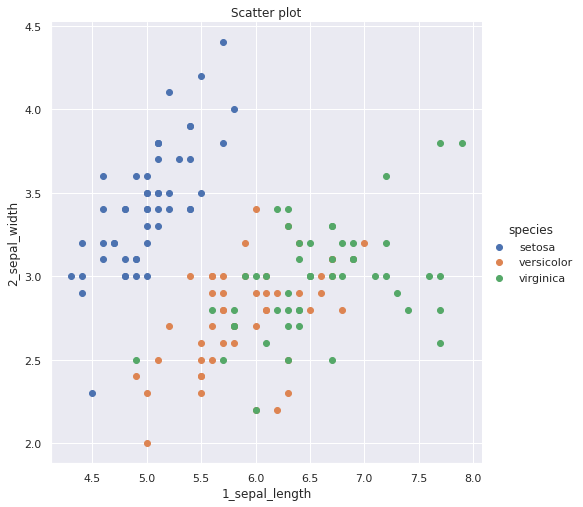

In [8]:
iris = sns.load_dataset("iris")
iris = iris.rename(index = str, columns = {'sepal_length':'1_sepal_length','sepal_width':'2_sepal_width', 'petal_length':'3_petal_length', 'petal_width':'4_petal_width'})

sns.FacetGrid(iris, hue="species", size=7) .map(plt.scatter,"1_sepal_length", "2_sepal_width", )  .add_legend()
plt.title('Scatter plot')
df1 = iris[["1_sepal_length", "2_sepal_width",'species']]

In [11]:
def predict_NB_gaussian_class(X,mu_list,std_list,pi_list): 
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = (norm.pdf(x = X[0], loc = mu_list[p][0][0], scale = std_list[p][0][0] )  
                * norm.pdf(x = X[1], loc = mu_list[p][0][1], scale = std_list[p][0][1] ) 
                * pi_list[p])
        scores_list.append(score)
             
    return np.argmax(scores_list)

def predict_Bayes_class(X,mu_list,sigma_list): 
    scores_list = []
    classes = len(mu_list)
    for p in range(classes):
        score = scipy.stats.multivariate_normal.pdf(X, mean=mu_list[p], cov=sigma_list[p])
        scores_list.append(score)
    return np.argmax(scores_list)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


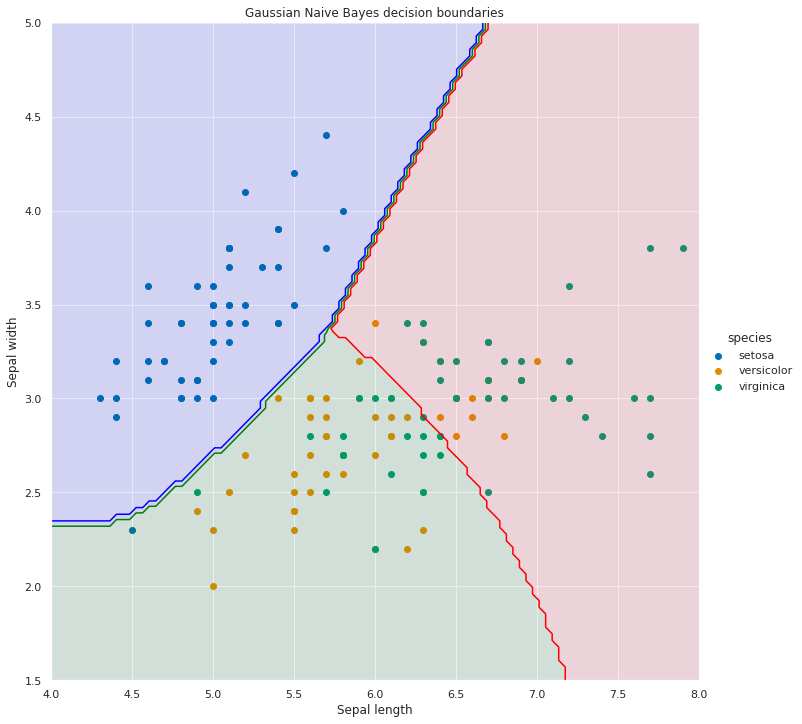

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


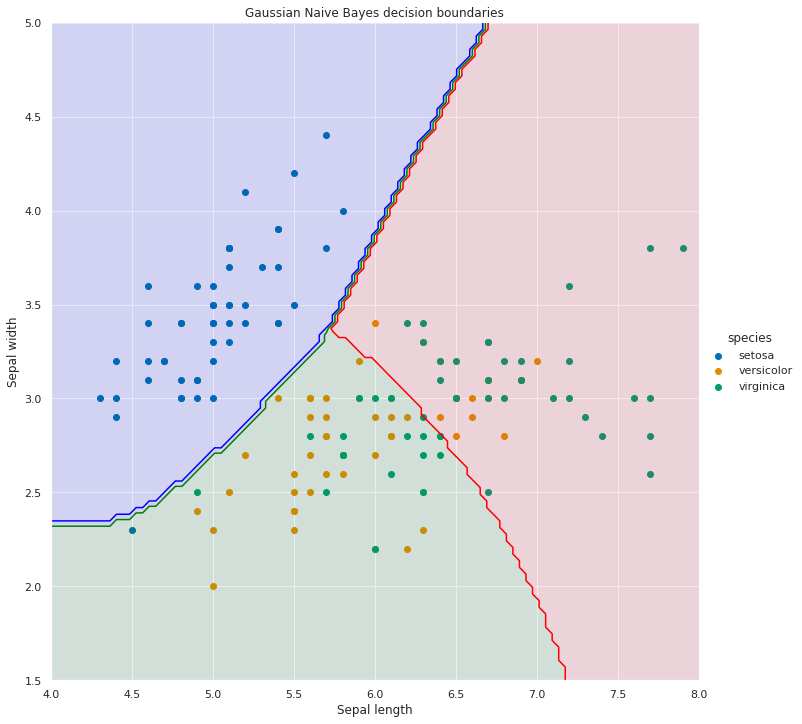

In [12]:
#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )


#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()#Estimating the parameters
mu_list = np.split(df1.groupby('species').mean().values,[1,2])
std_list = np.split(df1.groupby('species').std().values,[1,2], axis = 0)
pi_list = df1.iloc[:,2].value_counts().values / len(df1)

N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax

zz = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

Z = zz.reshape(X.shape)

my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))
my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature 

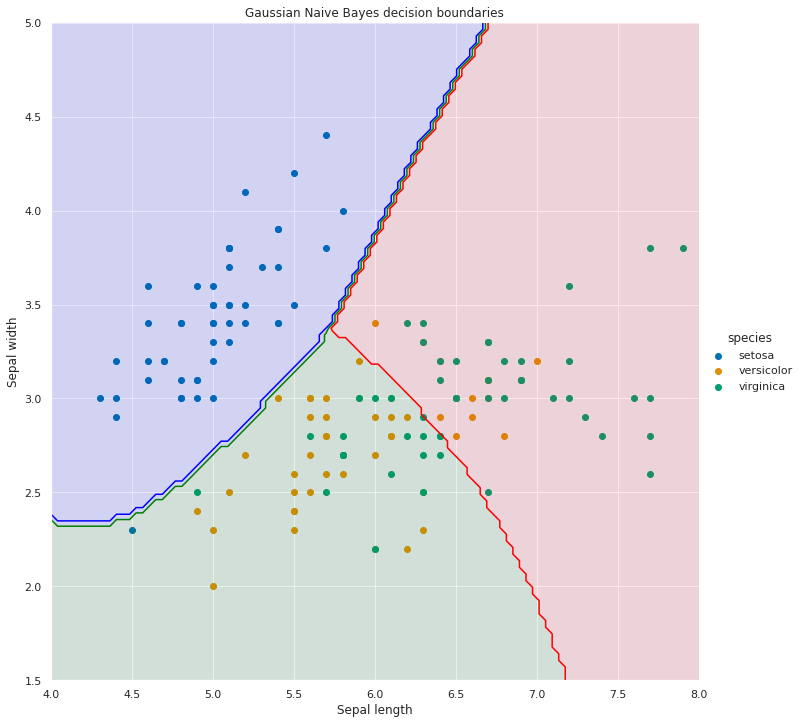

In [15]:
from sklearn.naive_bayes import GaussianNB
X_data = df1.iloc[:,0:2]
y_labels = df1.iloc[:,2].replace({'setosa':0,'versicolor':1,'virginica':2}).copy()

model_sk = GaussianNB(priors = None)
model_sk.fit(X_data,y_labels)

N = 100
X = np.linspace(4, 8, N)
Y = np.linspace(1.5, 5, N)
X, Y = np.meshgrid(X, Y)

color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris, hue="species", size=10, palette = 'colorblind') .map(plt.scatter, "1_sepal_length", "2_sepal_width",)  .add_legend()
my_ax = g.ax

zz = np.array(  [model_sk.predict( [[xx,yy]])[0] for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

Z = zz.reshape(X.shape)

my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('Gaussian Naive Bayes decision boundaries')

plt.show()

In [16]:
y_pred = np.array(  [predict_NB_gaussian_class( np.array([xx,yy]).reshape(-1,1), mu_list, std_list, pi_list) 
                     for xx, yy in zip(np.ravel(X_data.values[:,0]), np.ravel(X_data.values[:,1])) ] )
display(np.mean(y_pred == y_labels))
display(model_sk.score(X_data,y_labels))

0.78

0.78

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'color'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: The following kwargs were not used by contour: 'color'


[(-8.0, 8.0), (-8.0, 8.0)]

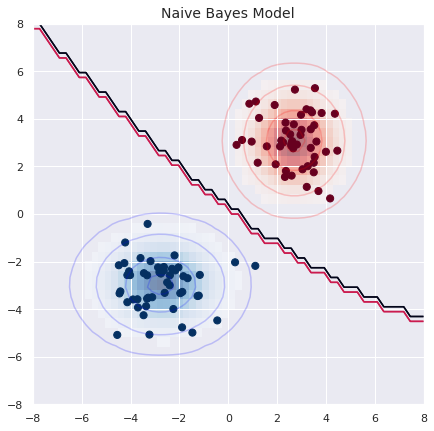

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=[[3,3],[-3,-3]], random_state=2, cluster_std=[1,1])

fig, ax = plt.subplots(figsize = (7,7))

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-8, 8)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

model_sk_1 = GaussianNB(priors = None)
model_sk_1.fit(X,y)

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    Xgrid_Pred = model_sk_1.predict(Xgrid)
    ax.contour(xx, yy, Xgrid_Pred.reshape(xx.shape),1,color = 'red')
    
ax.set(xlim=xlim, ylim=ylim)